# Wine_Quality

Classifying the quality of wine as Good or Not Good based on the compositions

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the data
url='https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv'

In [47]:
#Reading the data and storing it to a variable
data=pd.read_csv(url)

In [4]:
#Viewing the top 5 rows of data
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Top 5 rows are displayed, we can see all the data are in numeric

In [5]:
#Viewing last 5 rows
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


Bottom 5 rows are displayed, we can see all the data are in numeric

From the data set our target variable is quality. The values inside quality are discrete. So we need to apply classification model techniques

In [6]:
data.shape

(1599, 12)

There are 1599 rows and 12 columns in the data set

### Exploratory Data Analysis 

In [7]:
#Checking data types
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

All the columns are in float type, and target variable in int type

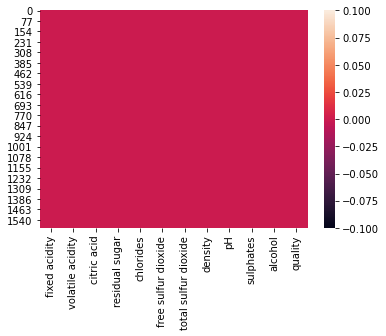

In [8]:
#Let us check for null values
sns.heatmap(data.isna())

Visually we can see that there is no missing data

In [9]:
#Checking for any missing values
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing data in any of the column

In [10]:
#Let us see different values in quality column
print(data['quality'].unique())


[5 6 7 4 8 3]


We can see there are different qualities : 3 , 4 ,5 , 6 ,7 & 8 

In [11]:
#Let us see the count of different qualities in the given data set
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

We can see majority of our data has : Mediocre quality - 5,6 
    Less data about - Least and High quality - 3 , 8
    

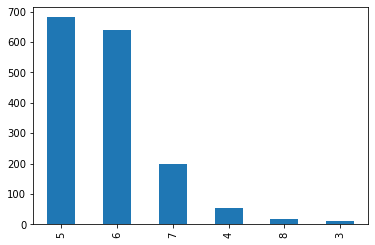

In [12]:
#Seeing graphically
data['quality'].value_counts().plot(kind='bar')

The data is imbalanced 

Suggested to consider 7 or above as Good/1 and below as not good or 0

In [16]:
data['quality']

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [48]:
for i in data['quality']:
    if i<7:
        data['quality']=data['quality'].replace(i,'0').astype(int)
    elif i>=7:
        data['quality']=data['quality'].replace(i,'1').astype(int)

Text(0.5, 1.0, 'Wine_Quality')

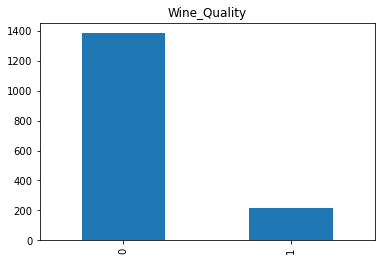

In [54]:
data['quality'].value_counts().plot(kind='bar')
plt.title('Wine_Quality')

We have less data of good quality and more data of not good quality

In [52]:
#Checking the count of values
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [55]:
#Checking the statistical summary
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


Observations :
    1) Mean is > median in columns : fixed acidity, citric acid, recidual sugar,chlorides, free sulfur dioxide, total sulfur          dioxide, from this we can say they are right skewed.
    2) Median is > mean in columns : volatile acidity,
    3) Huge difference between 75% & Max in : fixed acidity, volatile acidity, citric acid, residual sugar,chlorides, free            sulfur dioxide,total sulfur dioxide, sulphates,alcohol from this we can say there might be outliers in these columns
    4) Outliers are present in these columns for sure : residual sugar, free sulphur dioxide, total sulphur dioxide and alcohol        since they have huge difference and also high std values 
    

fixed acidity              AxesSubplot(0.125,0.657941;0.168478x0.222059)
volatile acidity        AxesSubplot(0.327174,0.657941;0.168478x0.222059)
citric acid             AxesSubplot(0.529348,0.657941;0.168478x0.222059)
residual sugar          AxesSubplot(0.731522,0.657941;0.168478x0.222059)
chlorides                  AxesSubplot(0.125,0.391471;0.168478x0.222059)
free sulfur dioxide     AxesSubplot(0.327174,0.391471;0.168478x0.222059)
total sulfur dioxide    AxesSubplot(0.529348,0.391471;0.168478x0.222059)
density                 AxesSubplot(0.731522,0.391471;0.168478x0.222059)
pH                            AxesSubplot(0.125,0.125;0.168478x0.222059)
sulphates                  AxesSubplot(0.327174,0.125;0.168478x0.222059)
alcohol                    AxesSubplot(0.529348,0.125;0.168478x0.222059)
quality                    AxesSubplot(0.731522,0.125;0.168478x0.222059)
dtype: object

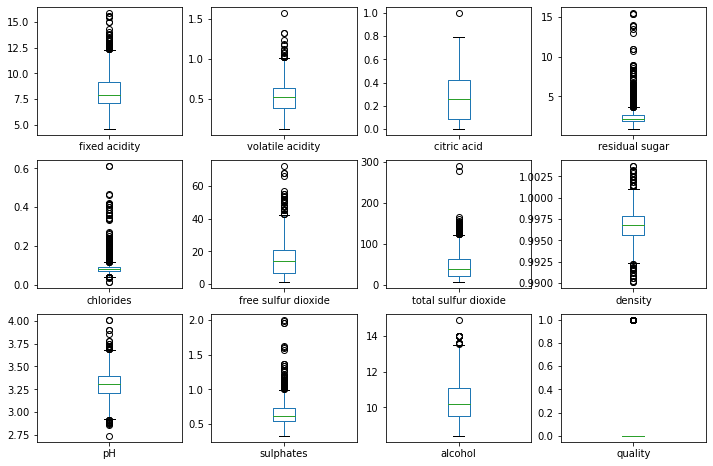

In [57]:
#Checking for outliers visually
data.plot(kind='box',subplots=True,layout=(3,4),figsize=(12,8))

We can see that there are outliers present in every column

In [58]:
#checking for skewness
data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 2.129363
dtype: float64

In [59]:
#Removing Outliers
from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.39625599],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.39625599],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.39625599],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.39625599],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.39625599],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.39625599]])

The output are the difference from the mean, xtimes of std

In [60]:
#Fixing threshold value
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
        557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
        649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
        695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
        889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
       1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
       1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
       1270, 1270, 1288, 1289, 1295, 1296, 1299, 1

All those row indexes are having values more than 3*std 

In [63]:
data_new=data[(z<3).all(axis=1)]

Outliers removed and stored into new variable


In [67]:
#Number of rows remaining after removing outliers
print("Shape before removing outliers: ",data.shape)
print('Shape after removing outliers: ',data_new.shape)

Shape before removing outliers:  (1599, 12)
Shape after removing outliers:  (1458, 12)


In [68]:
print('No. of rows removed: ', data.shape[0]-data_new.shape[0])

No. of rows removed:  141


In [70]:
#Checking again for skewness after removing outliers
data_new.skew()


fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
quality                 2.103030
dtype: float64

In [71]:
#Let us see the correlation before removing skewness
data_new.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.296566,0.699747,0.175809,0.187853,-0.146702,-0.098843,0.660497,-0.704507,0.200796,-0.018384,0.124746
volatile acidity,-0.296566,1.000000,-0.589286,0.032331,0.070307,0.008824,0.104585,-0.000446,0.252900,-0.350547,-0.212767,-0.268236
citric acid,0.699747,-0.589286,1.000000,0.178784,0.104950,-0.072097,0.007320,0.372338,-0.521270,0.303401,0.164420,0.226809
residual sugar,0.175809,0.032331,0.178784,1.000000,0.121287,-0.005795,0.091381,0.343236,-0.072787,0.071218,0.162423,0.115612
chlorides,0.187853,0.070307,0.104950,0.121287,1.000000,-0.057342,0.040874,0.330104,-0.183105,0.025329,-0.209711,-0.112431
free sulfur dioxide,-0.146702,0.008824,-0.072097,-0.005795,-0.057342,1.000000,0.660348,-0.039334,0.107444,0.059713,-0.076400,-0.085448
total sulfur dioxide,-0.098843,0.104585,0.007320,0.091381,0.040874,0.660348,1.000000,0.116386,-0.007726,-0.037164,-0.257834,-0.171294
density,0.660497,-0.000446,0.372338,0.343236,0.330104,-0.039334,0.116386,1.000000,-0.311217,0.127562,-0.469611,-0.154221
pH,-0.704507,0.252900,-0.521270,-0.072787,-0.183105,0.107444,-0.007726,-0.311217,1.000000,-0.039558,0.136659,-0.079528
sulphates,0.200796,-0.350547,0.303401,0.071218,0.025329,0.059713,-0.037164,0.127562,-0.039558,1.000000,0.240684,0.310206


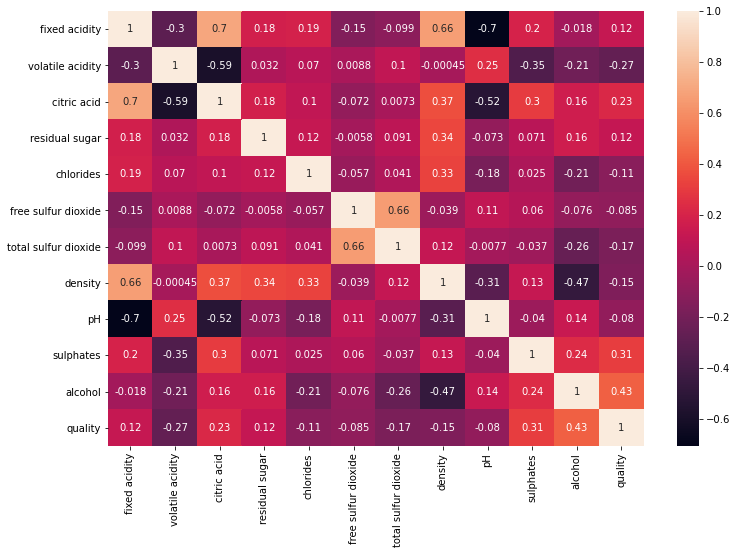

In [74]:
#Visualising corr for better understanding and removing unnecessary columns
plt.figure(figsize=(12,8))
sns.heatmap(data_new.corr(),annot=True)

In [78]:
data_new.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [82]:
df=data_new.drop(columns=['residual sugar','free sulfur dioxide'],axis=1)

In [83]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [84]:
df.shape

(1458, 10)

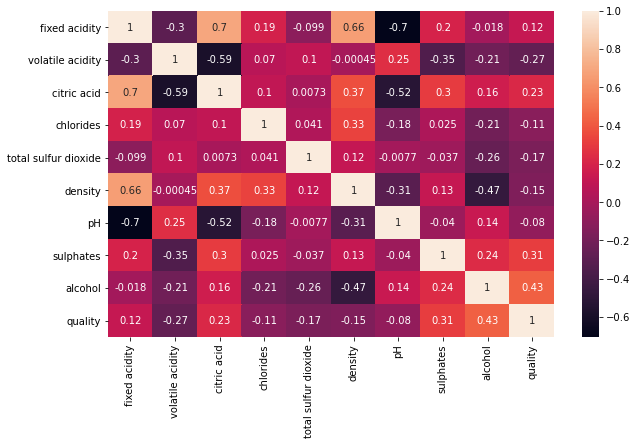

In [86]:
#We removed two unwanted columns, Now let us see the corr
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

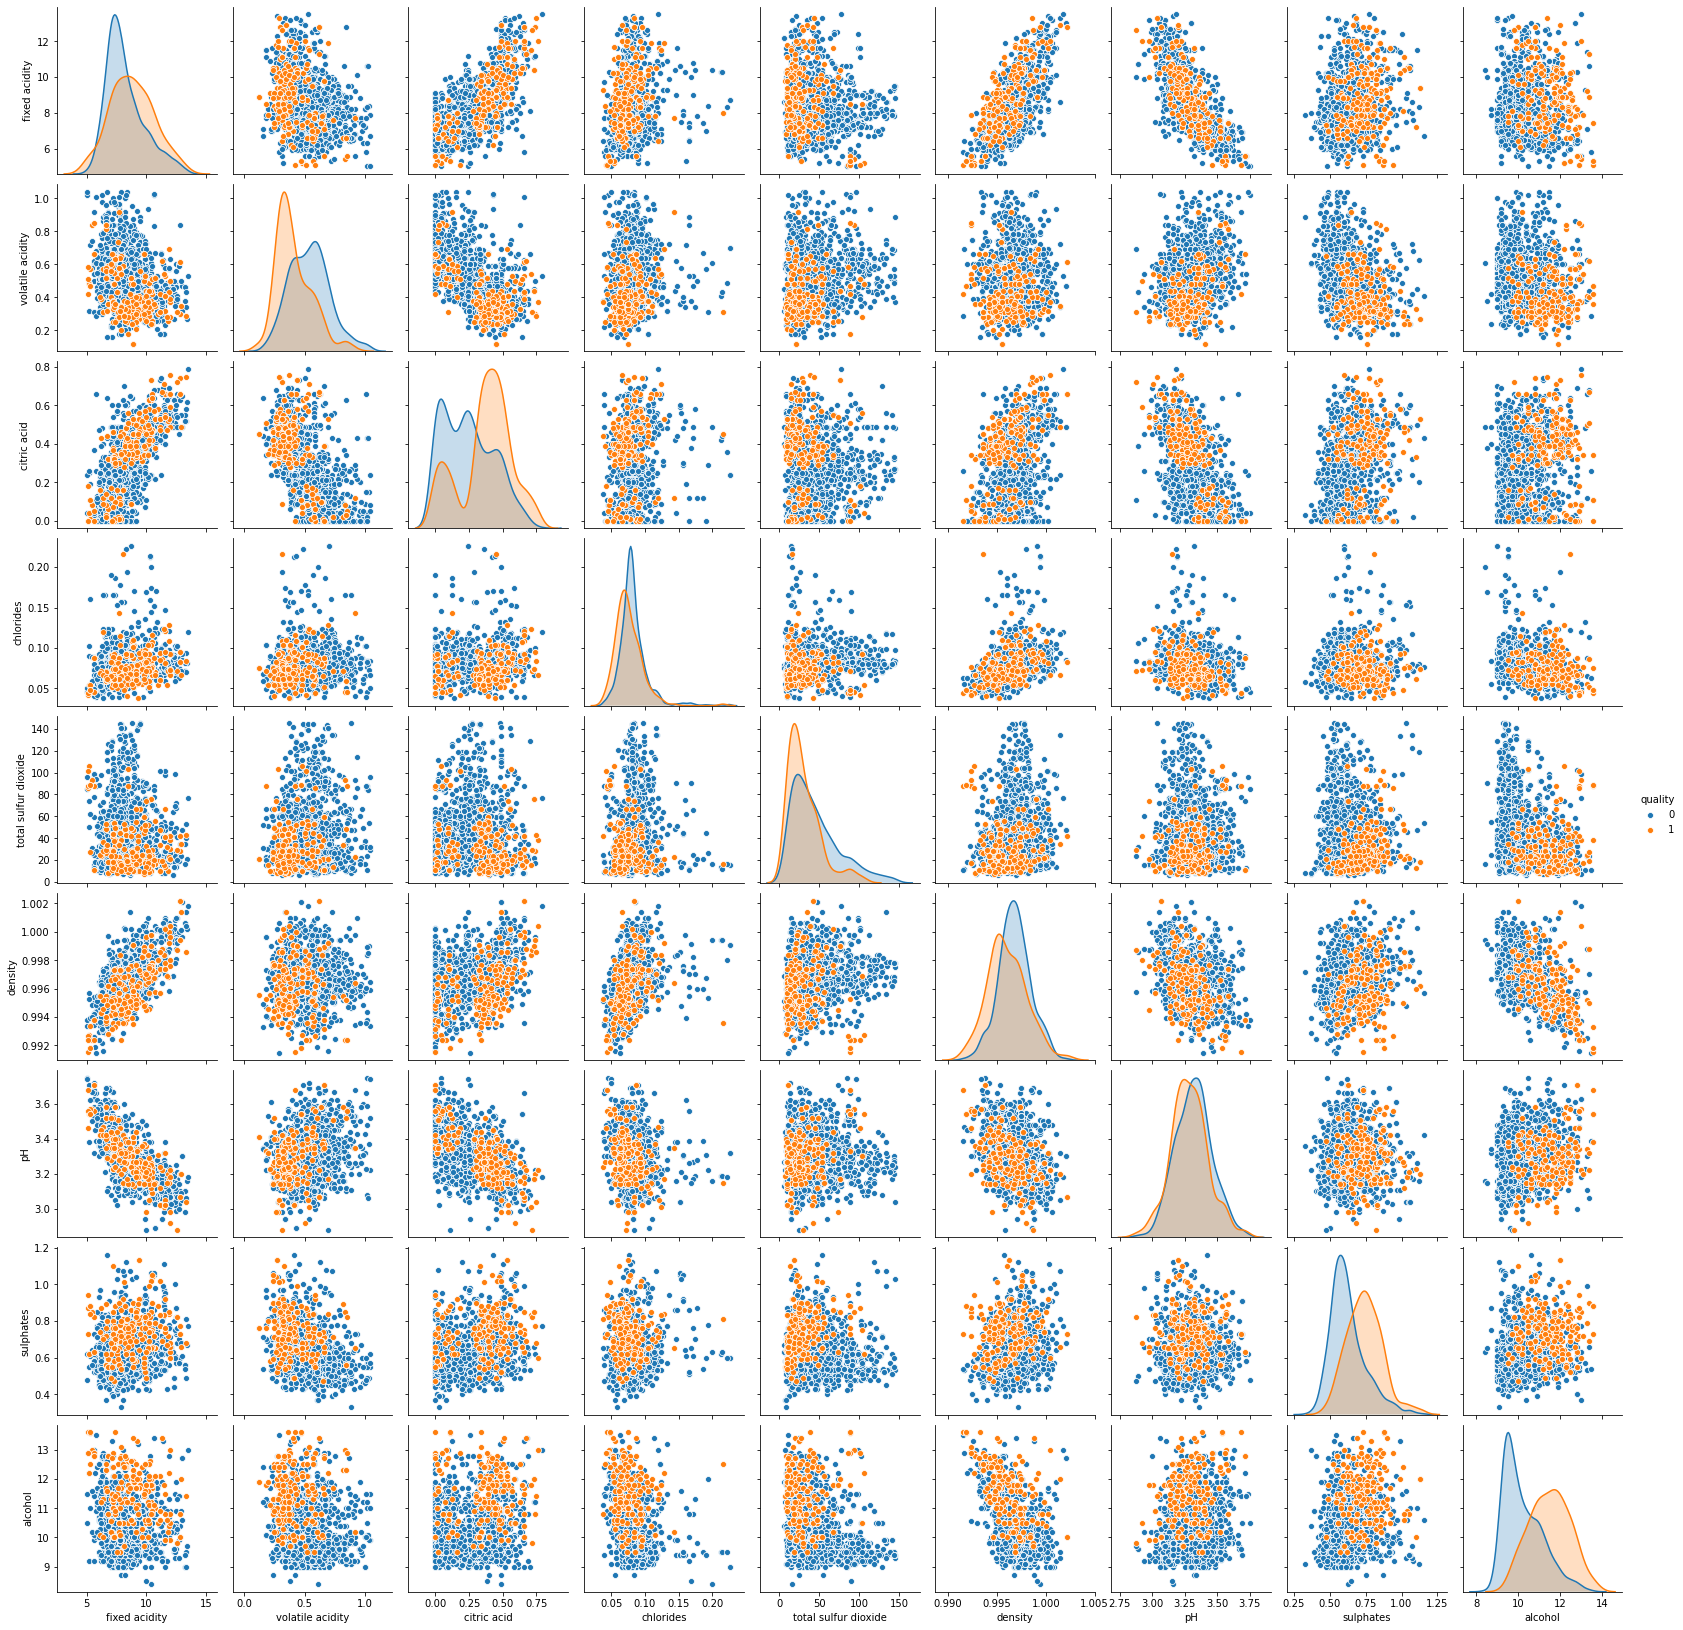

In [156]:
#Let us see the individual relationship b/w each and with quality 
sns.pairplot(df, hue='quality')

In [ ]:
Observations:
    

In [88]:
#Finding skewness 
df.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
chlorides               2.307274
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
quality                 2.103030
dtype: float64

Since it is classification model, no need of removing skewness, let us balance the dataset

In [98]:
#We need to import necessary libraries and models 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [99]:
#Splitting df into x and y
x=df.drop('quality',axis=1)
y=df['quality']

In [100]:
#Splitting them further into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [103]:
print('x_train:',x_train.shape)
print('x_test:',x_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

x_train: (1166, 9)
x_test: (292, 9)
y_train: (1166,)
y_test: (292,)


We got no.of rows and columns in each before balancing

In [108]:
#We need to balance only train data
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x_train,y_train=smt.fit_resample(x_train,y_train)


In [109]:
print('x_train:',x_train.shape)
print('x_test:',x_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

x_train: (2008, 9)
x_test: (292, 9)
y_train: (2008,)
y_test: (292,)


Now the data in training set is balanced

Data is ready to be sent for classification model

In [113]:
#Sending into dierent models and getting output
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [120]:
#Sending all the modles into a list
models=[LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB()]

In [124]:
for i in models:
    i.fit(x_train,y_train)
    predm=i.predict(x_test)
    print(f'accuracy score of {i}:',accuracy_score(y_test,predm))
    print(f'confusion matrix of {i}:\n',confusion_matrix(y_test,predm))
    print(f'classification report of {i}:\n',classification_report(y_test,predm))
    print('\n')

accuracy score of LogisticRegression(): 0.7773972602739726
confusion matrix of LogisticRegression():
 [[196  57]
 [  8  31]]
classification report of LogisticRegression():
               precision    recall  f1-score   support

           0       0.96      0.77      0.86       253
           1       0.35      0.79      0.49        39

    accuracy                           0.78       292
   macro avg       0.66      0.78      0.67       292
weighted avg       0.88      0.78      0.81       292



accuracy score of SVC(): 0.7157534246575342
confusion matrix of SVC():
 [[181  72]
 [ 11  28]]
classification report of SVC():
               precision    recall  f1-score   support

           0       0.94      0.72      0.81       253
           1       0.28      0.72      0.40        39

    accuracy                           0.72       292
   macro avg       0.61      0.72      0.61       292
weighted avg       0.85      0.72      0.76       292



accuracy score of DecisionTreeClassifier(

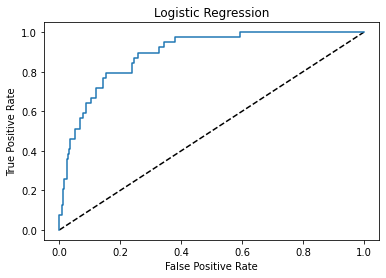

auc-score for Logistic Regression:  0.7847876760920238


In [133]:
#Plotting auc_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
lg=LogisticRegression()
lg.fit(x_train,y_train)
#predicting probability of having 1 in data
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.show()
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print("auc-score for Logistic Regression: ",auc_score)

In [128]:
#Cross validating the models to find the best model
from sklearn.model_selection import cross_val_score
kfold=KFold()
for m in models:
    mscore=cross_val_score(m,x,y,cv=5)
    print(f"cv score of {m}:",mscore)
    print('Mean of cv score:',mscore.mean())
    print('std of mean',mscore.std())
    print('\n')


cv score of LogisticRegression(): [0.88013699 0.86986301 0.89383562 0.86597938 0.88659794]
Mean of cv score: 0.879282587205197
std of mean 0.010312503727305125


cv score of SVC(): [0.8630137  0.8630137  0.85958904 0.86254296 0.86254296]
Mean of cv score: 0.8621404698018171
std of mean 0.0012929682756927664


cv score of DecisionTreeClassifier(): [0.85958904 0.79109589 0.8630137  0.7766323  0.82817869]
Mean of cv score: 0.8237019253401121
std of mean 0.035020122708329604


cv score of KNeighborsClassifier(): [0.87328767 0.84931507 0.85958904 0.81099656 0.86597938]
Mean of cv score: 0.8518335451678201
std of mean 0.021883938021767066


cv score of GaussianNB(): [0.8869863  0.70547945 0.89383562 0.74914089 0.87972509]
Mean of cv score: 0.8230334698488914
std of mean 0.07949328008863181




AUC-ROC curve for the the best model

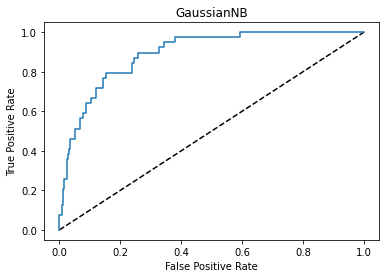

auc-score for GaussianNB:  0.7847876760920238


In [137]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
#predicting probability of having 1 in data
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GaussianNB')
plt.show()
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print("auc-score for GaussianNB: ",auc_score)

In [138]:
#Now let us do hyperparameter tuning for our best model - using GridSearchCV
from sklearn.model_selection import GridSearchCV


In [139]:
inputs={'var_smoothing':np.logspace(0,-9,num=100)}
grid=GridSearchCV(GaussianNB(),inputs,cv=5)
grid.fit(x,y)
print(grid)


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})


In [141]:
#Results
print('Best Score: ',grid.best_score_)
print('Best Estimator: ',grid.best_estimator_)
print('Best parameters: ',grid.best_params_)

Best Score:  0.8621404698018171
Best Estimator:  GaussianNB(var_smoothing=1.0)
Best parameters:  {'var_smoothing': 1.0}


From above we can see that , GaussianNB with parameter var_smoothing=1.0 giving the highest accuracy - 0.86 : 86%

In [163]:
#Making the final model with the best parameters
gnb=GaussianNB(var_smoothing=1.0)
gnb.fit(x,y)
pred=gnb.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       253
           1       0.00      0.00      0.00        39

    accuracy                           0.87       292
   macro avg       0.43      0.50      0.46       292
weighted avg       0.75      0.87      0.80       292



In [164]:
#saving the model
import joblib
joblib.dump(gnb,'BestModel.obj')

['BestModel.obj']